In [7]:
import pickle
from sklearn.model_selection import train_test_split
from helpers.evaluate_model import evaluate_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
with open('out/df_final.pkl', 'rb') as f:
    df = pickle.load(f)

X = df.drop('topic_label', axis=1)
y = df['topic_label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf1 = RandomForestClassifier(random_state = 42)
clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)
    
smote_Xtrain = load_pickle('out/smote_Xtrain.pkl')
smote_Xtest = load_pickle('out/smote_Xtest.pkl')
smote_ytrain = load_pickle('out/smote_ytrain.pkl')
smote_ytest = load_pickle('out/smote_ytest.pkl')

In [8]:
clf2 = RandomForestClassifier(random_state = 42)
clf2.fit(smote_Xtrain, smote_ytrain)

RandomForestClassifier(random_state=42)

In [10]:
with open('out/best_SMOTE_rf.pkl', 'rb') as f:
    cf3 = pickle.load(f)

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
with open("supervised_train_test_data/train_test_data.pkl", "rb") as f:
    data = pickle.load(f)

X_s_train = data['X_train']
X_s_test = data['X_test']
y_s_train = data['y_train']
y_s_test = data['y_test']

In [11]:
with open('out/best_Stratified_rf.pkl', 'rb') as f:
    cf4 = pickle.load(f)

Mean CV ROC AUC Score: 0.9902535988540133
Test Data AUC ROC: 0.990049514293888


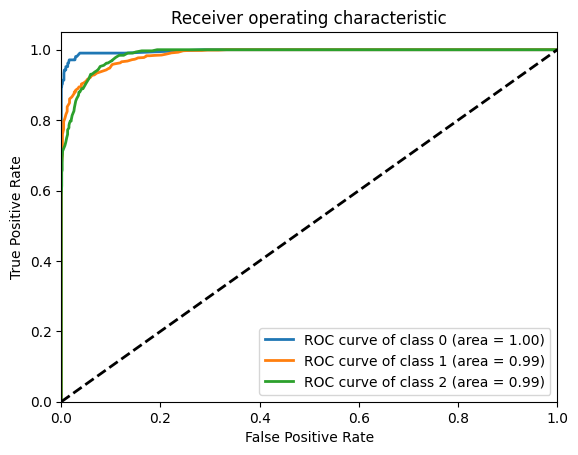

              precision    recall  f1-score   support

      Events       1.00      0.89      0.94       104
   Lifestyle       0.95      0.97      0.96       993
    Politics       0.89      0.86      0.87       316

    accuracy                           0.94      1413
   macro avg       0.95      0.91      0.93      1413
weighted avg       0.94      0.94      0.94      1413



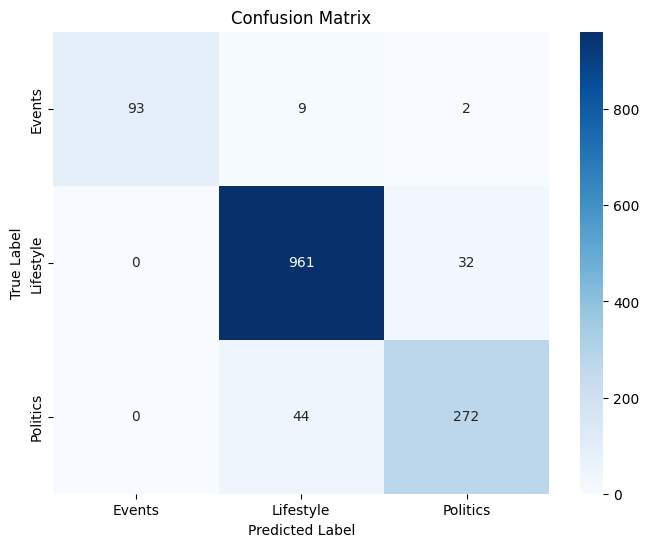

In [15]:
evaluate_model(clf1, X_train, y_train, X_test, y_test)

Mean CV ROC AUC Score: 0.9985219054015179
Test Data AUC ROC: 0.9986093256003437


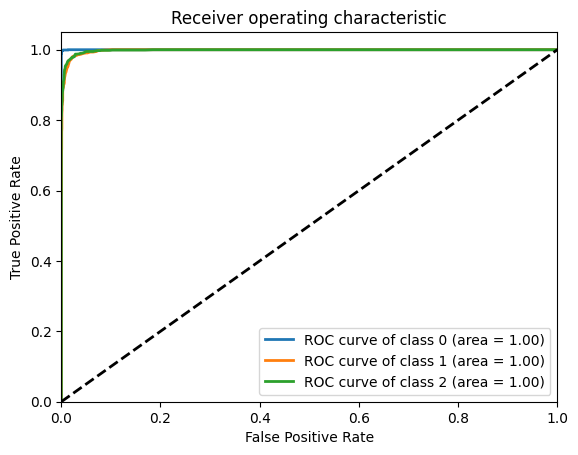

              precision    recall  f1-score   support

      Events       1.00      1.00      1.00      1219
   Lifestyle       0.97      0.96      0.96      1208
    Politics       0.96      0.98      0.97      1200

    accuracy                           0.98      3627
   macro avg       0.98      0.98      0.98      3627
weighted avg       0.98      0.98      0.98      3627



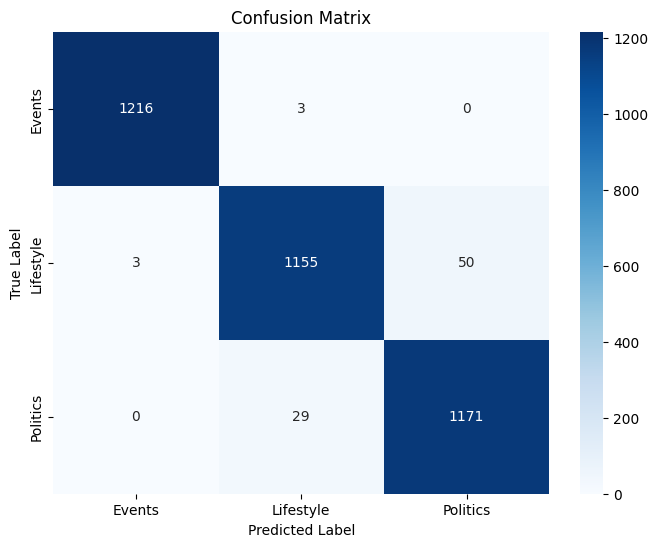

In [16]:
evaluate_model(clf2, smote_Xtrain, smote_ytrain, smote_Xtest, smote_ytest)

Mean CV ROC AUC Score: 0.998973128048061
Test Data AUC ROC: 0.9989576687670055


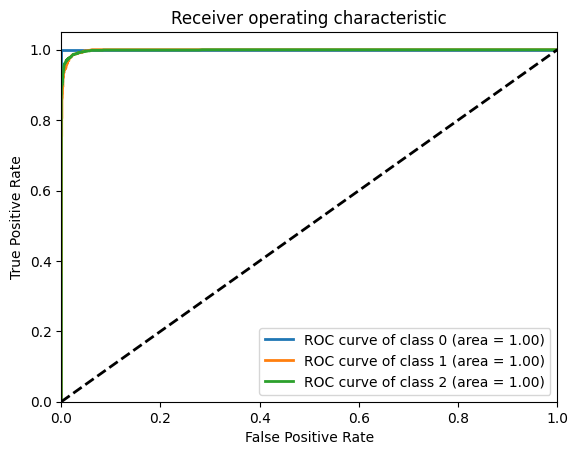

              precision    recall  f1-score   support

      Events       1.00      1.00      1.00      1219
   Lifestyle       0.97      0.97      0.97      1208
    Politics       0.98      0.97      0.97      1200

    accuracy                           0.98      3627
   macro avg       0.98      0.98      0.98      3627
weighted avg       0.98      0.98      0.98      3627



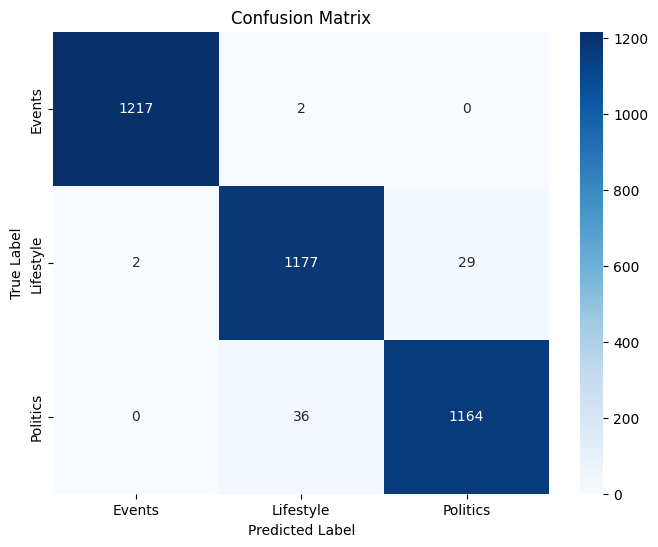

In [18]:
evaluate_model(cf3, smote_Xtrain, smote_ytrain, smote_Xtest, smote_ytest)

In [19]:
evaluate_model(cf4, X_s_train, X_s_test, y_s_train, y_s_test)

ValueError: Multioutput target data is not supported with label binarization